In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Data Loading: 

In [2]:
! pip install scikit-image

In [19]:
import os

from skimage import io
from skimage.color import rgb2gray

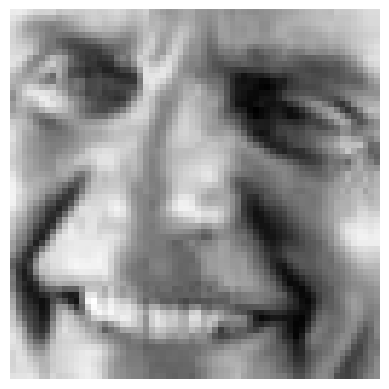

In [16]:
img = rgb2gray(io.imread('../_data/_smile/smile/James_Jones_0001.jpg'))
plt.imshow(img, cmap='gray');
plt.axis('off');

In [26]:
spath = '../_data/_smile/smile/'
nspath = '../_data/_smile/non_smile/'

sfiles = os.listdir('../_data/_smile/smile/')
nsfiles = os.listdir('../_data/_smile/non_smile/')

print('#smile files:', len(sfiles))
print('#non-smile files:', len(nsfiles))

#smile files: 600
#non-smile files: 603


In [40]:
X_smile = np.empty((len(sfiles), 64*64))
X_nsmile = np.empty((len(nsfiles), 64*64))

y = []

for i in range(len(sfiles)):
    img = rgb2gray(io.imread(os.path.join(spath, sfiles[i])))
    X_smile[i, :] = img.flatten()
    y.append(1)
    

for i in range(len(nsfiles)):
    img = rgb2gray(io.imread(os.path.join(nspath, nsfiles[i])))
    X_nsmile[i, :] = img.flatten()
    y.append(0)

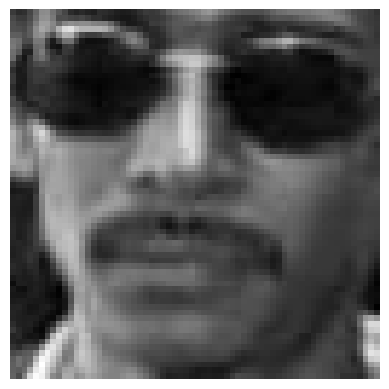

In [38]:
plt.imshow(np.reshape(X_nsmile[np.random.randint(0, len(nsfiles)), :],
                      (64, 64)), cmap='gray');
plt.axis('off');

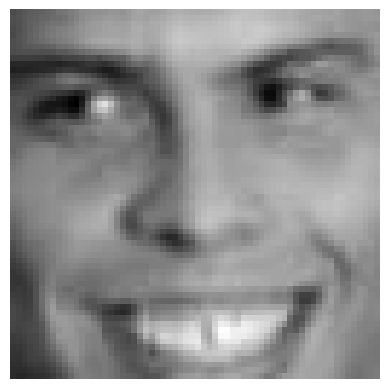

In [39]:
plt.imshow(np.reshape(X_smile[np.random.randint(0, len(sfiles)), :],
                      (64, 64)), cmap='gray');
plt.axis('off');

In [44]:
X = np.concatenate([X_smile, X_nsmile], axis=0)
y = np.asarray(y)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(962, 4096) (962,)
(241, 4096) (241,)


# Classification: